In [1]:
# Dependencies

import pandas as pd
import numpy as np
from config import fred_key
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
from scipy.stats import linregress



In [2]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key= fred_key

params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

## Interest Rate Data Frame

In [3]:
int_rate_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]
int_rate_df

,date,value
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
818,2022-09-01,2.56
819,2022-10-01,3.08
820,2022-11-01,3.78
821,2022-12-01,4.10


In [4]:
# API Series ID's for China, Finland, Sudan
china_gdp_series_id = "MKTGDPCNA646NWDB"
fin_gdp_series_id = "MKTGDPFIA646NWDB"
sudan_gdp_series_id = "MKTGDPSDA646NWDB"

In [5]:
params_china = {"series_id": china_gdp_series_id, "apiKey": fred_key}
params_fin = {"series_id": fin_gdp_series_id, "apiKey": fred_key}
params_sudan = {"series_id": sudan_gdp_series_id, "apiKey": fred_key}

china_gdp_query = f"{fred_url}series_id={china_gdp_series_id}&api_key={fred_key}&file_type=json"
china_gdp_response = requests.get(china_gdp_query, params=params_china).json()
fin_gdp_query = f"{fred_url}series_id={fin_gdp_series_id}&api_key={fred_key}&file_type=json"
fin_gdp_response = requests.get(fin_gdp_query, params=params_fin).json()
sudan_gdp_query = f"{fred_url}series_id={sudan_gdp_series_id}&api_key={fred_key}&file_type=json"
sudan_gdp_response = requests.get(sudan_gdp_query, params=params_sudan).json()

In [6]:
china_gdp_df = pd.DataFrame(china_gdp_response["observations"])
china_gdp_df = china_gdp_df[["date", "value"]]
china_gdp_df.rename(columns={"value": "China GDP"})

,date,China GDP
0,1960-01-01,59716467625.3148
1,1961-01-01,50056868957.6732
2,1962-01-01,47209359005.6057
3,1963-01-01,50706799902.5104
4,1964-01-01,59708343488.5043
...,...,...
57,2017-01-01,12310409370892.8
58,2018-01-01,13894817549374.2
59,2019-01-01,14279937500606.5
60,2020-01-01,14687673892882.0


In [7]:
fin_gdp_df = pd.DataFrame(fin_gdp_response["observations"])
fin_gdp_df = fin_gdp_df[["date", "value"]]
fin_gdp_df.rename(columns={"value": "Finland GDP"})

,date,Finland GDP
0,1960-01-01,5224102195.52771
1,1961-01-01,5921659485.03284
2,1962-01-01,6340580854.39073
3,1963-01-01,6885920328.66187
4,1964-01-01,7766655085.78588
...,...,...
57,2017-01-01,255647979916.471
58,2018-01-01,275708001767.843
59,2019-01-01,268514916972.549
60,2020-01-01,271891788362.647


In [8]:
sudan_gdp_df = pd.DataFrame(sudan_gdp_response["observations"])
sudan_gdp_df = sudan_gdp_df[["date", "value"]]
sudan_gdp_df.rename(columns={"value": "Sudan GDP"})

,date,Sudan GDP
0,1960-01-01,1307333333.33333
1,1961-01-01,1419333333.33333
2,1962-01-01,1541666666.66667
3,1963-01-01,1568333333.33333
4,1964-01-01,1611333333.33333
...,...,...
57,2017-01-01,129717804934.614
58,2018-01-01,32333780383.2924
59,2019-01-01,32338079165.2893
60,2020-01-01,27034593750.0


In [9]:
merged_1_df = pd.merge(china_gdp_df, fin_gdp_df, on="date", how="inner")
merged_1_df.head()

,date,value_x,value_y
0,1960-01-01,59716467625.3148,5224102195.52771
1,1961-01-01,50056868957.6732,5921659485.03284
2,1962-01-01,47209359005.6057,6340580854.39073
3,1963-01-01,50706799902.5104,6885920328.66187
4,1964-01-01,59708343488.5043,7766655085.78588


In [10]:
merged_countries_df = pd.merge(merged_1_df, sudan_gdp_df, on="date", how="inner")
merged_countries_df = merged_countries_df.rename(columns={"value_x": "China GDP (MM)",
                                                         "value_y": "Finland GDP (MM)",
                                                         "value": "Sudan GDP (MM)"})
merged_countries_df["China GDP (MM)"] = pd.to_numeric(merged_countries_df["China GDP (MM)"],errors="coerce")
merged_countries_df["Finland GDP (MM)"] = pd.to_numeric(merged_countries_df["Finland GDP (MM)"],errors="coerce")
merged_countries_df["Sudan GDP (MM)"] = pd.to_numeric(merged_countries_df["Sudan GDP (MM)"],errors="coerce")

In [11]:
merged_countries_df

,date,China GDP (MM),Finland GDP (MM),Sudan GDP (MM)
0,1960-01-01,5.971647e+10,5.224102e+09,1.307333e+09
1,1961-01-01,5.005687e+10,5.921659e+09,1.419333e+09
2,1962-01-01,4.720936e+10,6.340581e+09,1.541667e+09
3,1963-01-01,5.070680e+10,6.885920e+09,1.568333e+09
4,1964-01-01,5.970834e+10,7.766655e+09,1.611333e+09
...,...,...,...,...
57,2017-01-01,1.231041e+13,2.556480e+11,1.297178e+11
58,2018-01-01,1.389482e+13,2.757080e+11,3.233378e+10
59,2019-01-01,1.427994e+13,2.685149e+11,3.233808e+10
60,2020-01-01,1.468767e+13,2.718918e+11,2.703459e+10


In [12]:
merged_countries_df["China GDP (MM)"] = round(merged_countries_df["China GDP (MM)"]/1000000,2)
merged_countries_df["Finland GDP (MM)"] = round(merged_countries_df["Finland GDP (MM)"] / 1000000,2)
merged_countries_df["Sudan GDP (MM)"] = round(merged_countries_df["Sudan GDP (MM)"] / 1000000,2)
merged_countries_df.head()

,date,China GDP (MM),Finland GDP (MM),Sudan GDP (MM)
0,1960-01-01,59716.47,5224.10,1307.33
1,1961-01-01,50056.87,5921.66,1419.33
2,1962-01-01,47209.36,6340.58,1541.67
3,1963-01-01,50706.80,6885.92,1568.33
4,1964-01-01,59708.34,7766.66,1611.33


In [13]:
countries_int = pd.merge(merged_countries_df,int_rate_df,on="date",how="left")
countries_int = countries_int.rename(columns={"value": "Interest Rate"})
countries_int

,date,China GDP (MM),Finland GDP (MM),Sudan GDP (MM),Interest Rate
0,1960-01-01,59716.47,5224.10,1307.33,3.99
1,1961-01-01,50056.87,5921.66,1419.33,1.45
2,1962-01-01,47209.36,6340.58,1541.67,2.15
3,1963-01-01,50706.80,6885.92,1568.33,2.92
4,1964-01-01,59708.34,7766.66,1611.33,3.48
...,...,...,...,...,...
57,2017-01-01,12310409.37,255647.98,129717.80,0.65
58,2018-01-01,13894817.55,275708.00,32333.78,1.41
59,2019-01-01,14279937.50,268514.92,32338.08,2.40
60,2020-01-01,14687673.89,271891.79,27034.59,1.55


In [14]:
countries_int["date"] = pd.to_datetime(countries_int["date"])
countries_int["Interest Rate"] = pd.to_numeric(countries_int["Interest Rate"], errors="coerce")
countries_int.to_csv("output_data/china_fin_sudan.csv")
countries_int

,date,China GDP (MM),Finland GDP (MM),Sudan GDP (MM),Interest Rate
0,1960-01-01,59716.47,5224.10,1307.33,3.99
1,1961-01-01,50056.87,5921.66,1419.33,1.45
2,1962-01-01,47209.36,6340.58,1541.67,2.15
3,1963-01-01,50706.80,6885.92,1568.33,2.92
4,1964-01-01,59708.34,7766.66,1611.33,3.48
...,...,...,...,...,...
57,2017-01-01,12310409.37,255647.98,129717.80,0.65
58,2018-01-01,13894817.55,275708.00,32333.78,1.41
59,2019-01-01,14279937.50,268514.92,32338.08,2.40
60,2020-01-01,14687673.89,271891.79,27034.59,1.55


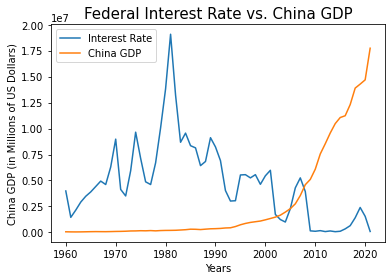

In [35]:
plt.plot(countries_int["date"],(countries_int["Interest Rate"]*1000000),label="Interest Rate")
plt.plot(countries_int["date"],countries_int["China GDP (MM)"],label="China GDP")
plt.title("Federal Interest Rate vs. China GDP",fontsize=15)
plt.xlabel("Years")
plt.ylabel("China GDP (in Millions of US Dollars)")
plt.legend()
plt.savefig('output_data/int_vs_china_gdp_line.svg')
plt.show()

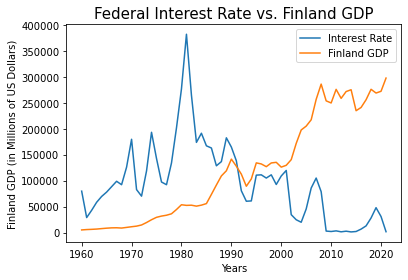

In [36]:
plt.plot(countries_int["date"],(countries_int["Interest Rate"]*20000),label="Interest Rate")
plt.plot(countries_int["date"],countries_int["Finland GDP (MM)"],label="Finland GDP")
plt.title("Federal Interest Rate vs. Finland GDP",fontsize=15)
plt.xlabel("Years")
plt.ylabel("Finland GDP (in Millions of US Dollars)")
plt.legend()
plt.savefig('output_data/int_vs_fin_gdp_line.svg')
plt.show()

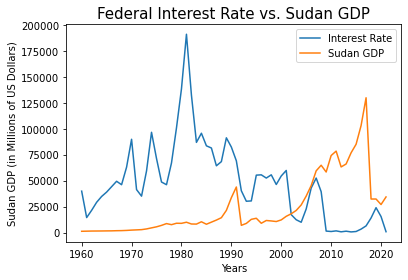

In [37]:
plt.plot(countries_int["date"],(countries_int["Interest Rate"]*10000),label="Interest Rate")
plt.plot(countries_int["date"],countries_int["Sudan GDP (MM)"],label="Sudan GDP")
plt.title("Federal Interest Rate vs. Sudan GDP",fontsize=15)
plt.xlabel("Years")
plt.ylabel("Sudan GDP (in Millions of US Dollars)")
plt.legend()
plt.savefig('output_data/int_vs_sudan_gdp_line.svg')
plt.show()

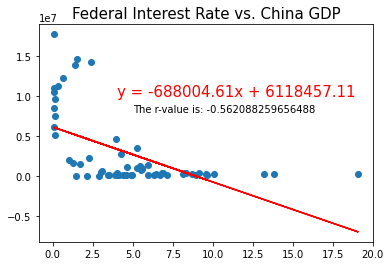

In [38]:
plt.scatter(countries_int["Interest Rate"], countries_int["China GDP (MM)"],marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(countries_int["Interest Rate"],countries_int["China GDP (MM)"])
regress_values = countries_int["Interest Rate"] * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(countries_int["Interest Rate"],regress_values,"r-")
plt.annotate(line_eq,(4,10000000),fontsize=15,color="red")
text =(f"The r-value is: {rvalue}")
plt.text(5,8000000,text)
plt.title("Federal Interest Rate vs. China GDP",fontsize=15)
plt.savefig('output_data/int_vs_china_gdp_plot.svg')
plt.show()

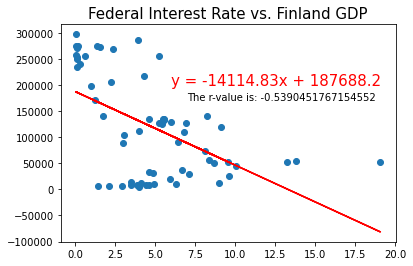

In [39]:
plt.scatter(countries_int["Interest Rate"], countries_int["Finland GDP (MM)"],marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(countries_int["Interest Rate"],countries_int["Finland GDP (MM)"])
regress_values = countries_int["Interest Rate"] * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(countries_int["Interest Rate"],regress_values,"r-")
plt.annotate(line_eq,(6,200000),fontsize=15,color="red")
text = (f"The r-value is: {rvalue}")
plt.text(7,170000,text)
plt.title("Federal Interest Rate vs. Finland GDP",fontsize=15)
plt.savefig('output_data/int_vs_fin_gdp_plot.svg')
plt.show()

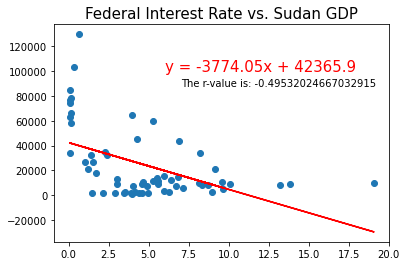

In [40]:
plt.scatter(countries_int["Interest Rate"], countries_int["Sudan GDP (MM)"],marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(countries_int["Interest Rate"],countries_int["Sudan GDP (MM)"])
regress_values = countries_int["Interest Rate"] * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(countries_int["Interest Rate"],regress_values,"r-")
plt.annotate(line_eq,(6,100000),fontsize=15,color="red")
text = (f"The r-value is: {rvalue}")
plt.text(7,88000,text)
plt.title("Federal Interest Rate vs. Sudan GDP",fontsize=15)
plt.savefig('output_data/int_vs_sudan_gdp_plot.svg')
plt.show()